In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class EKF:
    def __init__(self, P, A, Q, R):
        '''
        P: Predicted estimate covariance
        A: The state-transition model
        Q: The covariance of the process noise
        H: The observation model
        R: The covariance of the observation noise
        K: Kalman gain
        '''        
        self.P = P
        self.A = A        
        self.Q = Q
        self.H = None
        self.R = R
        self.K = None

    def step(self, x, z):
        # Predict
        x = np.dot(self.A, x)
        self.P = np.dot(self.A, np.dot(self.P, self.A.T)) + self.Q
        
        # Kalman Gain
        self.H = self.get_H(x)
        self.K = np.dot(np.dot(self.P, self.H.T), np.linalg.pinv(np.dot(self.H, np.dot(self.P, self.H.T)) + self.R))
        
        # Estimate
        x = x + np.dot(self.K, (z - self.get_pred(x)))
        
        # Update P
        self.P = self.P - np.dot(self.K, np.dot(self.H, self.P))
        
        return x
    
    def get_pred(self, x):
        return np.matrix([np.sqrt(np.square(x[0, 0]) + np.square(x[2, 0]))])

    def get_H(self, x):
        return np.matrix([[x[0, 0] / (np.sqrt(np.square(x[0, 0]) + np.square(x[2, 0]))), 0, x[2, 0] / (np.sqrt(np.square(x[0, 0]) + np.square(x[2, 0])))]])

### Data

In [3]:
# Set Random Seed
np.random.seed(42)

# Generate Data
position = 0
velocity = 100
altitude = 1000
dt = 0.05

num = 400
mea_dis = []
mea_pos = []
mea_vel = []
mea_alt = []
for i in range(num):
    v = velocity + 5 * np.random.randn()
    a = altitude + 10 * np.random.randn()
    p = position + velocity * dt
    d = np.sqrt(np.square(a) + np.square(p)) + p * 0.05 * np.random.randn()
    mea_dis.append(d)
    mea_pos.append(p)
    mea_vel.append(v)
    mea_alt.append(a)
    position = p

### Run

In [4]:
# Set Parameters
x = np.matrix([[0], 
               [90],
               [1100]])
P = np.matrix([[10, 0, 0], 
               [0, 10, 0],
               [0, 0, 10]])
A = np.matrix([[1, 0.05, 0], 
               [0, 1, 0], 
               [0, 0, 1]])
Q = np.matrix([[0, 0, 0], 
               [0, 0.001, 0],
               [0, 0, 0.001]])
R = np.matrix([10])

# Kalman Filter
kalman = EKF(P, A, Q, R)
est_pos = []
est_vel = []
est_alt = []
Ps = []
Ks = []
for z in mea_dis:
    z = np.matrix([z])
    x = kalman.step(x, z)
    est_pos.append(x[0, 0])
    est_vel.append(x[1, 0])
    est_alt.append(x[2, 0])
est_dis = np.sqrt(np.square(est_pos) + np.square(est_alt))

### Graph

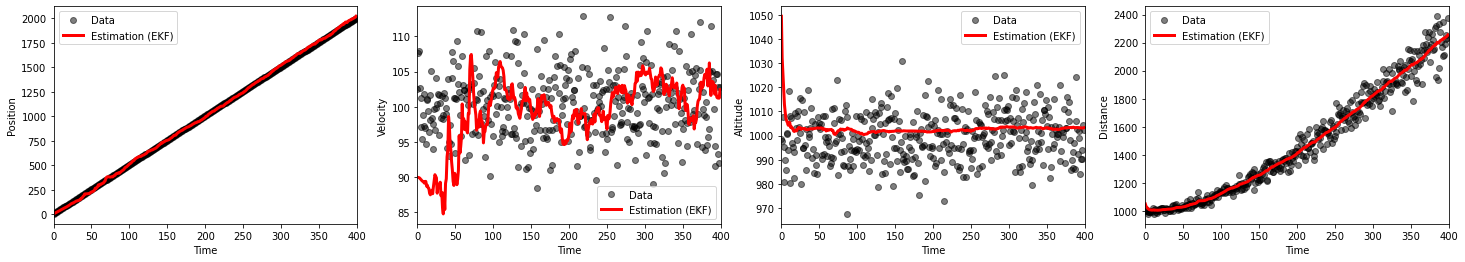

In [5]:
plt.figure(figsize=(25, 4))

plt.subplot(1, 4, 1)
plt.plot(mea_pos, 'o', alpha=0.5, color='k', label='Data')
plt.plot(est_pos, lw=3, color='r', label='Estimation (EKF)')
plt.legend()
plt.xlim(0, num)
plt.xlabel('Time')
plt.ylabel('Position')

plt.subplot(1, 4, 2)
plt.plot(mea_vel, 'o', alpha=0.5, color='k', label='Data')
plt.plot(est_vel, lw=3, color='r', label='Estimation (EKF)')
plt.legend()
plt.xlim(0, num)
plt.xlabel('Time')
plt.ylabel('Velocity')

plt.subplot(1, 4, 3)
plt.plot(mea_alt, 'o', alpha=0.5, color='k', label='Data')
plt.plot(est_alt, lw=3, color='r', label='Estimation (EKF)')
plt.legend()
plt.xlim(0, num)
plt.xlabel('Time')
plt.ylabel('Altitude')

plt.subplot(1, 4, 4)
plt.plot(mea_dis, 'o', alpha=0.5, color='k', label='Data')
plt.plot(est_dis, lw=3, color='r', label='Estimation (EKF)')
plt.legend()
plt.xlim(0, num)
plt.xlabel('Time')
plt.ylabel('Distance')

plt.show()